In [10]:
import json
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

total = 307

In [11]:
def eval(file, threshold):
    with open(file) as f:
        wordsdict = json.load(f)

    true = [1] * threshold
    pred = []
    cutwordlist = wordsdict[:total]
    predictedstop=[item[0] for item in cutwordlist]
    # print(predictedstop)

    corpuswide = []
    fr = open('corpuswide-stop.txt', 'r')
    for line in fr:
        corpuswide.append(line.strip('\r\n'))
    fr.close()

#     print(corpuswide)

    i = 0
    for word in corpuswide:
        if i > (threshold-1):
            break
        if word in predictedstop:
            pred.append(1)
            i += 1
        else:
            pred.append(0)
            i += 1

    # print(pred)

    # print(true)
    # print(pred)
    # print(f1_score(true, pred[:threshold], average='macro'))
    return f1_score(true, pred[:threshold], average='macro')


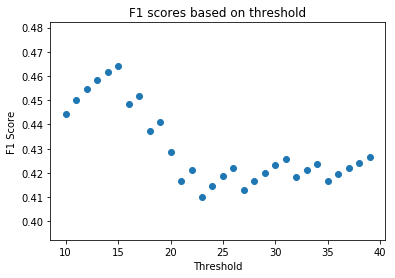

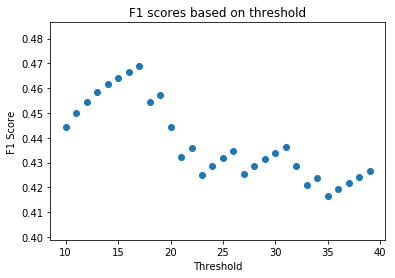

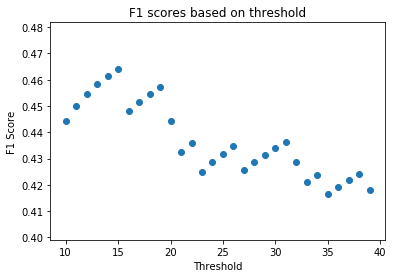

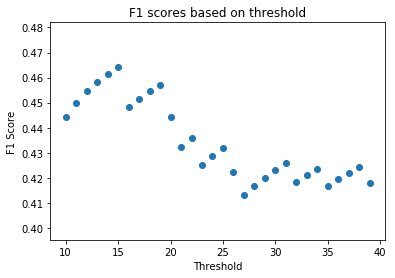

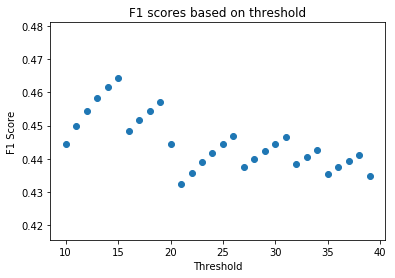

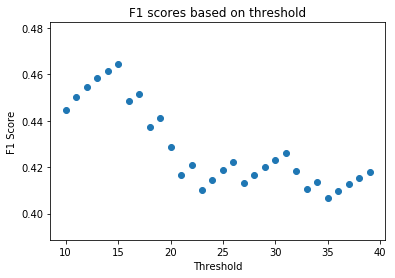

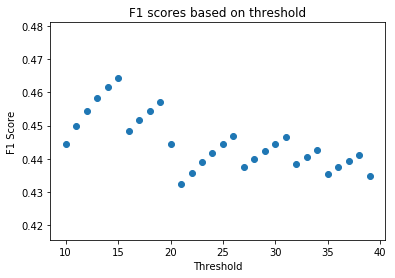

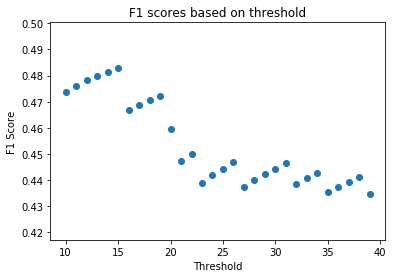

In [12]:
if __name__ == '__main__':
    files = ['LDA/rank1.json', 'LDA/rank2.json', 'LDA/rank3.json', 'LDA/rank4.json', 'LDA/rank5.json', 'LDA/rank6.json', 'LDA/rank7.json', 'LDA/rank8.json']
    for file in files: 
        threshold = []
        f1scores = []
        for i in range(10,40):
            threshold.append(i)
            f1scores.append(eval(file, i))

        plt.scatter(threshold, f1scores)
        plt.title('F1 scores based on threshold')
        plt.xlabel('Threshold')
        plt.ylabel('F1 Score')
        plt.show()
